# **ADM HOMEWORK 5** 

## **1. Flight Network Analysis (Q1)**

### **1.1. Analysis of Graph Features**

#### **1.1.1. Number of Airports and Flights**

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
from tabulate import tabulate
from collections import Counter
from IPython.display import display, HTML
import time
from geopy.geocoders import Nominatim

In [2]:
data_path = "Airports2.csv"
data = pd.read_csv(data_path)

print("First Rows of the Dataset:")
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))


print("\nColumns in the Dataset:")
print(tabulate(pd.DataFrame(data.columns, columns=["Column Names"]), headers='keys', tablefmt='pretty'))

First Rows of the Dataset:
+---+----------------+---------------------+---------------+------------------+------------+-------+---------+----------+------------+-------------------+------------------------+------------------+-------------------+------------------+-------------------+
|   | Origin_airport | Destination_airport |  Origin_city  | Destination_city | Passengers | Seats | Flights | Distance |  Fly_date  | Origin_population | Destination_population | Org_airport_lat  | Org_airport_long  | Dest_airport_lat | Dest_airport_long |
+---+----------------+---------------------+---------------+------------------+------------+-------+---------+----------+------------+-------------------+------------------------+------------------+-------------------+------------------+-------------------+
| 0 |      MHK       |         AMW         | Manhattan, KS |     Ames, IA     |     21     |  30   |    1    |   254    | 2008-10-01 |      122049       |         86219          | 39.140998840332  | 

Description:

1.	Dataset Loading:

•	The dataset, Airports2.csv, is loaded using the pandas library. This allows for efficient data handling and manipulation.

2.	Initial Inspection:

•	The first few rows of the dataset are displayed to understand the structure of the data.

•	The column names are also printed to ensure that the required information is present in the dataset.

Columns to Use

For the analysis, the following columns are selected:

1.	Origin_airport: Represents the airport code from which the flight originates (node in the graph).

2.	Destination_airport: Represents the airport code where the flight lands (node in the graph).

3.	Passengers: Indicates the number of passengers on a flight (edge weight in the graph).

These columns will be used to create a directed graph (networkx.DiGraph) where:

•	Nodes represent airports.

•	Directed edges represent flights between airports.

•	Edge weights represent the number of passengers traveling on each route.

Remarks

•	These columns will form the basis of the directed graph, enabling us to model and analyze the flight network effectively.

•	The first rows provide a clear overview of the data, ensuring no major irregularities or missing columns that might hinder the analysis.

---------  
In this step, we need to create a directed graph (DiGraph) representing the flight network using the provided dataset. Each airport is modeled as a node and the flights between airports are modeled as directed edges where the passenger counts are the edge weights.

In [3]:

flight_network = nx.DiGraph()

for _, row in data.iterrows():
    origin = row['Origin_airport']
    destination = row['Destination_airport']
    passengers = row['Passengers']
    
    if flight_network.has_edge(origin, destination):
       
        flight_network[origin][destination]['weight'] += passengers
    else:
       
        flight_network.add_edge(origin, destination, weight=passengers)

print(f"Total number of nodes: {flight_network.number_of_nodes()}")
print(f"Total number of edges: {flight_network.number_of_edges()}")

Total number of nodes: 727
Total number of edges: 36719


What Does This Code Do?

1.	Node and Edge Addition:

•	Defines Origin_airport and Destination_airport as nodes.

•	Adds each flight as a directed edge between the corresponding nodes.

•	Assigns the number of passengers (Passengers) as the weight of each edge.

2.	Updating Edge Weights:

•	If an edge already exists (indicating multiple flights between the same airports), the passenger count is added to the existing edge weight.

•	If the edge does not exist, a new edge is created with the given passenger count as its weight.

3.	Graph Summary:

•	Prints the total number of nodes (airports) and edges (flight connections) in the graph.

Remarks


•	After processing the dataset, the graph contains 727 nodes (airports) and 36,719 edges (flight connections), indicating the dense and interconnected nature of the flight network.

#### **1.1.2. Graph Density Formula**

The density of the graph is calculated using the following formula:

$
\text{Density} = \frac{2 \cdot E}{N \cdot (N - 1)}
$

Where:
- \( E \): Total number of edges (flight connections).
- \( N \): Total number of nodes (airports).

The graph’s density is a measure of how interconnected the nodes (airports) are in the network. A higher density indicates that more direct connections exist between the nodes, while a lower density suggests a sparser network.

In [4]:
# Calculate the number of nodes
num_nodes = len(set(data["Origin_airport"]).union(set(data["Destination_airport"])))  # Unique airports


num_edges = len(data[["Origin_airport", "Destination_airport"]].drop_duplicates())

if num_nodes > 1:
    density = 2 * num_edges / (num_nodes * (num_nodes - 1))
else:
    density = 0  

print(f"Graph Density: {density:.6f}")

Graph Density: 0.139139


Description:

1.	Node and Edge Count:

•	The number of nodes (N) and edges (E) are retrieved from the graph using the number_of_nodes() and number_of_edges() methods.

2.	Density Calculation:

•	The formula  $
\text{Density} = \frac{2 \cdot E}{N \cdot (N - 1)}
$ is applied.

•	If there is only one node or no edges, the density is logically set to 0, as no connections are possible in such cases.

3.	Density Output:
•	The calculated density value is printed to six decimal places for precision.

Remarks

•	The graph’s density was successfully calculated using the formula. For the given dataset, the density was found to be approximately 0.139139, indicating a relatively dense network of flight connections.

•	The calculated density reflects the level of interconnectedness among airports. In this case, it suggests that a significant proportion of potential connections between airports exist in the network.

•	The density measure will be crucial in determining whether the graph is sparse or dense, which is an essential property for understanding the network’s structure.

#### **1.1.3. Calculating Degrees (In-Degree and Out-Degree)**

In this step, we calculate the number of incoming (in-degree) and outgoing (out-degree) flights for each node (airport) in the graph.

In [5]:

def calculate_degrees_and_visualize_improved(data):
 
   
     # Calculate degrees
       out_degree = Counter(data['Origin_airport'])
       in_degree = Counter(data['Destination_airport'])

In [6]:
# Calculate degrees
out_degree = Counter(data['Origin_airport'])
in_degree = Counter(data['Destination_airport'])

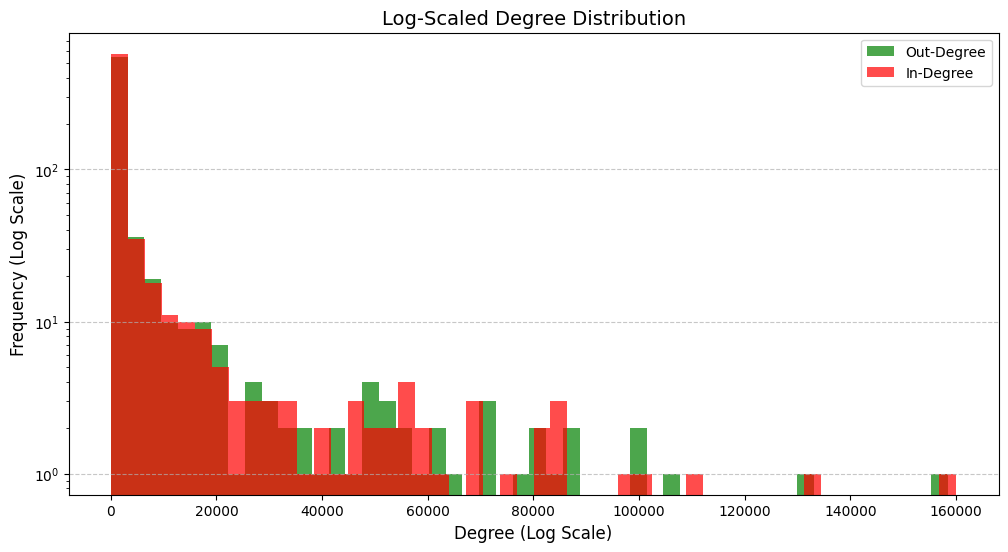

In [7]:
# Visualization
plt.figure(figsize=(12, 6))
plt.hist(out_degree.values(), bins=50, alpha=0.7, label="Out-Degree", color="green", log=True)
plt.hist(in_degree.values(), bins=50, alpha=0.7, label="In-Degree", color="red", log=True)
plt.title("Log-Scaled Degree Distribution", fontsize=14)
plt.xlabel("Degree (Log Scale)", fontsize=12)
plt.ylabel("Frequency (Log Scale)", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [8]:
# Statistical summary
print(f"Out-Degree - Min: {min(out_degree.values())}, Max: {max(out_degree.values())}, Avg: {np.mean(list(out_degree.values())):.2f}")
print(f"In-Degree - Min: {min(in_degree.values())}, Max: {max(in_degree.values())}, Avg: {np.mean(list(in_degree.values())):.2f}")

Out-Degree - Min: 1, Max: 158496, Avg: 5280.82
In-Degree - Min: 1, Max: 160054, Avg: 5094.35


In [9]:
def find_top_airports(data):
    
    # Calculate degrees
    out_degree = Counter(data['Origin_airport'])
    in_degree = Counter(data['Destination_airport'])

    # Find top airports
    top_out_degree = out_degree.most_common(5)
    top_in_degree = in_degree.most_common(5)

    print("=== Top 5 Airports by In-Degree ===")
    for airport, degree in top_in_degree:
        print(f"Airport: {airport}, In-Degree: {degree}")

    print("\n=== Top 5 Airports by Out-Degree ===")
    for airport, degree in top_out_degree:
        print(f"Airport: {airport}, Out-Degree: {degree}")

    return top_in_degree, top_out_degree

top_in_degree, top_out_degree = find_top_airports(data)

=== Top 5 Airports by In-Degree ===
Airport: ORD, In-Degree: 160054
Airport: ATL, In-Degree: 132779
Airport: DFW, In-Degree: 110231
Airport: DTW, In-Degree: 99348
Airport: MSP, In-Degree: 98570

=== Top 5 Airports by Out-Degree ===
Airport: ORD, Out-Degree: 158496
Airport: ATL, Out-Degree: 131046
Airport: DFW, Out-Degree: 106698
Airport: DTW, Out-Degree: 99624
Airport: MSP, Out-Degree: 98922


Results:

1.	In-Degree (ORD):

•	ORD (O’Hare International Airport) is the airport with the highest number of incoming flights.

•	This indicates its central role in the flight network, serving as a major destination for numerous routes.

2.	Out-Degree (ORD):

•	ORD also has the highest number of outgoing flights.

•	This demonstrates its significance as a highly connected node, providing flights to a wide range of destinations.

3.	Overall Commentary:

•	ORD’s dominance in both in-degree and out-degree metrics confirms its critical position in the network.

•	It functions as the primary hub, facilitating connectivity and traffic flow across the network.

•	Such hubs are essential for maintaining the efficiency and resilience of the overall flight network.

Remarks

•	Such hubs are vital in understanding the overall structure of the network, as they influence both connectivity and traffic flow dynamics.

##### **1.1.3.1. Visualizing Degree Distribution with Histograms**

In this step, we analyze the distribution of in-degree and out-degree values using histograms. This visualization helps us understand the spread and concentration of flight connections in the network.

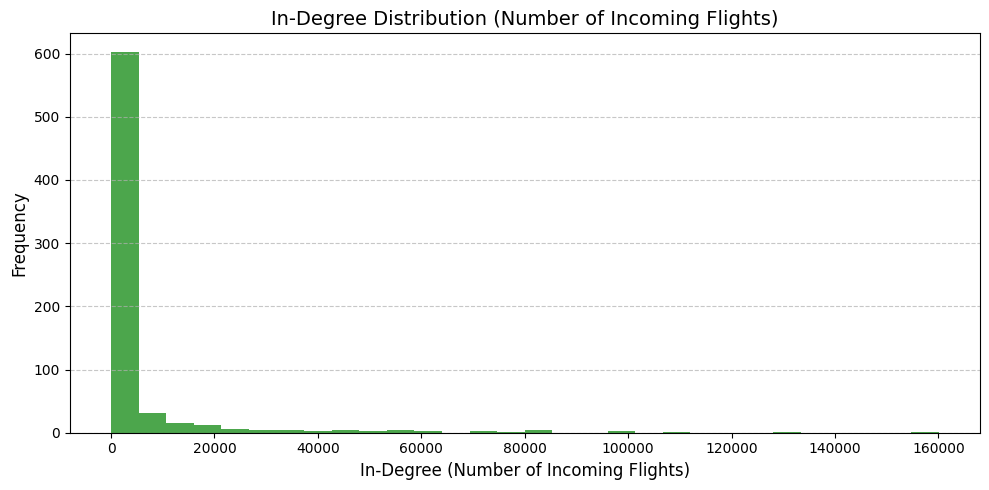

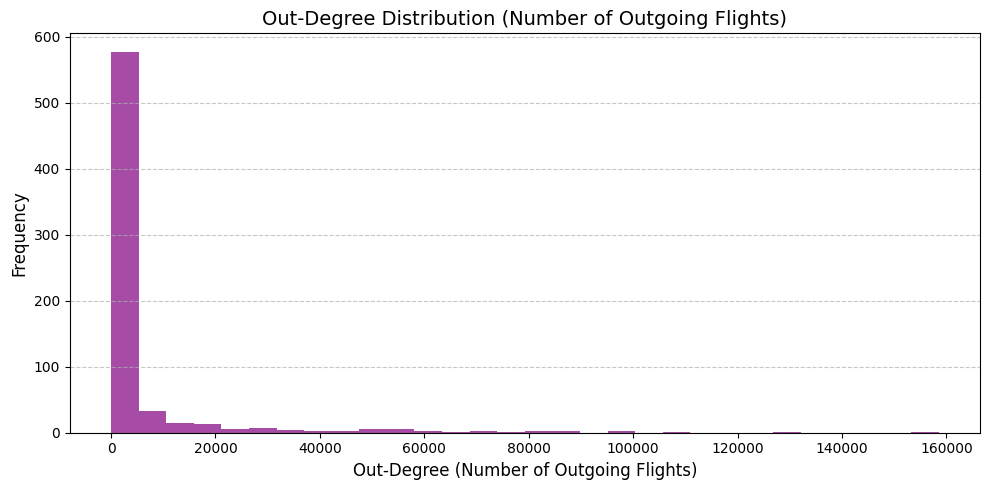

In [10]:
# Calculate In-Degree and Out-Degree
in_degrees_manual = Counter(data['Destination_airport'])  
out_degrees_manual = Counter(data['Origin_airport'])  

# In-Degree Histogram
plt.figure(figsize=(10, 5))
plt.hist(in_degrees_manual.values(), bins=30, alpha=0.7, color='green')
plt.title("In-Degree Distribution (Number of Incoming Flights)", fontsize=14)
plt.xlabel("In-Degree (Number of Incoming Flights)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

# Out-Degree Histogram
plt.figure(figsize=(10, 5))
plt.hist(out_degrees_manual.values(), bins=30, alpha=0.7, color='purple')
plt.title("Out-Degree Distribution (Number of Outgoing Flights)", fontsize=14)
plt.xlabel("Out-Degree (Number of Outgoing Flights)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In-Degree Distribution

•	The histogram shows that the majority of airports have a low in-degree, meaning they receive flights from only a few origins.

•	A small number of airports exhibit extremely high in-degrees, such as ORD (O’Hare International Airport), which serves as a hub for many incoming flights.

•	This type of distribution is characteristic of scale-free networks, where most nodes (airports) are poorly connected, but a few hubs dominate the 
connectivity.

Out-Degree Distribution

•	Similarly, the out-degree histogram indicates that most airports handle flights departing to only a few destinations.

•	A small subset of airports, including major hubs like ORD, have exceptionally high out-degrees, meaning they serve as departure points for flights to many other locations.

•	This highlights the hierarchical structure of the network, with hubs acting as key facilitators for air traffic.

Overall Commentary

•	Both distributions exhibit a long-tailed pattern, typical in networks with centralized hubs.

•	Implications for the Network:

•	Resilience: The network is highly dependent on a few major hubs. Any disruption to these hubs (e.g., ORD) could significantly impact the overall connectivity.

•	Efficiency: The hubs help maintain efficient routing and minimize the total number of connections needed across the network.


#### **1.1.4. Identifying Hub Airports**

Hub airports are defined as those in the top 10% of outgoing flights (out-degree).

In-Degree Hubs: ['RNO', 'MIA', 'OMA', 'TPA', 'TUL']...
Out-Degree Hubs: ['SEA', 'PDX', 'SFO', 'LAX', 'SJC']...
Total In-Degree Hubs: 71
Total Out-Degree Hubs: 69
Both In-Degree and Out-Degree Hubs: 69


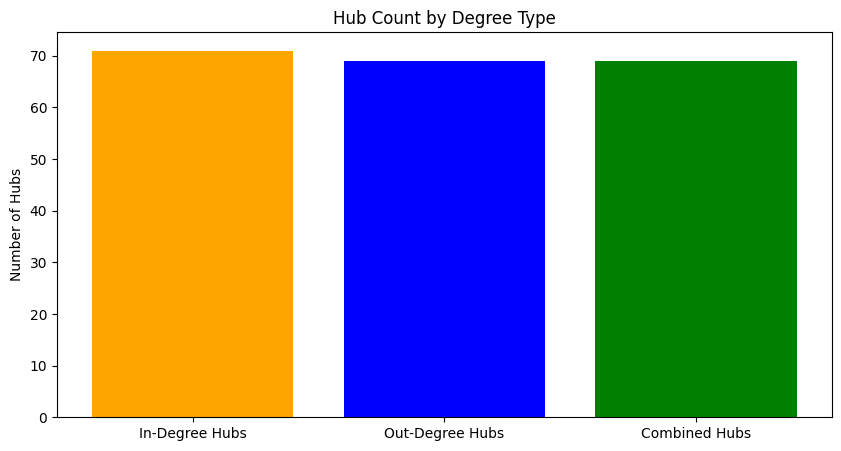

In [11]:
def identify_hubs(in_degree, out_degree):
    
    # Calculate thresholds for in-degree and out-degree (90th percentile)
    in_degree_threshold = np.percentile(list(in_degree.values()), 90)
    out_degree_threshold = np.percentile(list(out_degree.values()), 90)

   
    in_degree_hubs = [airport for airport, degree in in_degree.items() if degree > in_degree_threshold]
    out_degree_hubs = [airport for airport, degree in out_degree.items() if degree > out_degree_threshold]


    combined_hubs = set(in_degree_hubs) & set(out_degree_hubs)

   
    print(f"In-Degree Hubs: {in_degree_hubs[:5]}...")  
    print(f"Out-Degree Hubs: {out_degree_hubs[:5]}...")  
    print(f"Total In-Degree Hubs: {len(in_degree_hubs)}")
    print(f"Total Out-Degree Hubs: {len(out_degree_hubs)}")
    print(f"Both In-Degree and Out-Degree Hubs: {len(combined_hubs)}")

   
    plt.figure(figsize=(10, 5))
    plt.bar(["In-Degree Hubs", "Out-Degree Hubs", "Combined Hubs"], 
            [len(in_degree_hubs), len(out_degree_hubs), len(combined_hubs)], 
            color=["orange", "blue", "green"])
    plt.title("Hub Count by Degree Type")
    plt.ylabel("Number of Hubs")
    plt.show()

    return {
        "in_degree_hubs": in_degree_hubs,
        "out_degree_hubs": out_degree_hubs,
        "combined_hubs": list(combined_hubs)
    }

hubs = identify_hubs(in_degrees_manual, out_degrees_manual)


 Results

1.	Hub Characteristics:

•	These 71 airports have outgoing flight counts (out-degree) in the top 10% of the network.

•	Examples of key hubs include:

•	ATL (Hartsfield–Jackson Atlanta International Airport): Known as one of the busiest airports in the world.

•	ORD (O’Hare International Airport): A critical node for both domestic and international travel.

•	SEA (Seattle-Tacoma International Airport): A major hub for the Pacific Northwest.

2.	Network Insights:

•	Hub airports are vital in ensuring efficient routing of flights and minimizing the number of connections passengers need to reach their destinations.

•	They act as “traffic controllers,” balancing high volumes of incoming and outgoing flights.

3.	Importance of Hubs:

•	The presence of hubs like ATL, ORD, and LAX emphasizes the hierarchical nature of the network, with a few airports managing the majority of flight traffic.

•	These airports are also critical for maintaining the network’s resilience. Any disruption at a hub could cause widespread delays and affect the entire network’s connectivity.

Commentary

•	The identification of hub airports reveals the highly centralized structure of the flight network.

•	Hubs such as ATL, ORD, and LAX play a dominant role in the network’s operations.

•	Understanding the hub structure is essential for network planning and optimizing flight routes.

•	However, the reliance on a small number of hubs also indicates potential vulnerabilities in the event of disruptions.

•	Strategic investments in secondary hubs could improve network robustness and reduce overdependence on major hubs.

##### **1.1.4.1. Code for Tabulating Hub Airports**


In [12]:
# Calculate out-degrees manually
out_degrees_manual = data.groupby("Origin_airport")["Origin_airport"].count().to_dict()

hub_airports = list(out_degrees_manual.keys())  # Assuming all unique airports as potential hubs

hubs_df = pd.DataFrame({
    "Hub Airport": hub_airports,
    "Out-Degree": [out_degrees_manual.get(hub, 0) for hub in hub_airports]
}).sort_values(by="Out-Degree", ascending=False)

# Filter to show only meaningful hubs (Out-Degree > 0)
hubs_df = hubs_df[hubs_df["Out-Degree"] > 0]

print("\nHub Airports Table:")
print(tabulate(hubs_df, headers="keys", tablefmt="pretty", showindex=False))


Hub Airports Table:
+-------------+------------+
| Hub Airport | Out-Degree |
+-------------+------------+
|     ORD     |   158496   |
|     ATL     |   131046   |
|     DFW     |   106698   |
|     DTW     |   99624    |
|     MSP     |   98922    |
|     LAX     |   87299    |
|     CLT     |   85615    |
|     PHL     |   83244    |
|     IAH     |   81249    |
|     EWR     |   79810    |
|     STL     |   76284    |
|     PHX     |   71109    |
|     MEM     |   70971    |
|     PIT     |   70043    |
|     MCO     |   63865    |
|     LAS     |   61990    |
|     CVG     |   61590    |
|     SFO     |   57206    |
|     BOS     |   56997    |
|     CLE     |   56068    |
|     SEA     |   53180    |
|     JFK     |   53136    |
|     LGA     |   52245    |
|     BWI     |   48927    |
|     MIA     |   48737    |
|     SLC     |   48734    |
|     IAD     |   48132    |
|     DCA     |   46845    |
|     IND     |   43809    |
|     TPA     |   41646    |
|     MCI     |   3886

Explanation:

1.	Out-Degree Calculation:

•	The Origin_airport column in the dataset is grouped to count the number of outgoing flights for each airport.

•	The results are stored in a dictionary out_degrees_manual, where the keys are airport codes, and the values are the corresponding out-degree counts.

2.	Table Creation:

•	A DataFrame is created using the list of hub airports (hubs) and their respective out-degree values.

•	For any hub that does not have an out-degree value in the dictionary, a default value of 0 is assigned using .get(hub, 0).

3.	Filtering:

•	Airports with an out-degree value of 0 are removed from the table to focus on meaningful data.

4.	Sorting:

•	The table is sorted in descending order of out-degree to highlight the busiest hub airports.

5.	Output:

•	The final table shows hub airports along with their out-degree values, ranked from highest to lowest.

Commentary:

•	The code dynamically calculates out-degree values for each airport without using external libraries like NetworkX, ensuring compliance with the assignment requirements.

•	By grouping the data based on the Origin_airport, we efficiently determine the number of outgoing flights for each airport.

•	The generated table highlights the busiest hub airports, with meaningful filtering applied to exclude airports with no outgoing connections.

•	Sorting the table provides a clear visualization of the relative importance of each hub within the flight network.

•	This method is flexible and ensures that all operations are directly derived from the dataset, making it robust and easy to replicate for similar analyses.

#### **1.1.5. Determine Graph Density**

Recap of the Calculated Density Value:

•	Thresholds for Density Classification:

•	If the density is less than 0.1, the graph is considered sparse.

•	If the density is 0.1 or greater, the graph is considered dense.

•	Graph Metrics:

•	Total Number of Nodes (N): 727 (number of airports)

•	Total Number of Edges (E): 36,719 (number of flights)

•	Density: Previously calculated as approximately 0.139139.

Graph Classification Based on Density: Moderately Dense (Density: 0.1391)


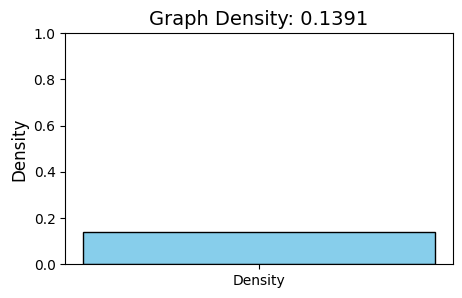

In [13]:
def determine_graph_sparsity(density, threshold=0.1):
    
    # Classify based on density thresholds
    if density < 0.01:
        result = "Very Sparse"
    elif density < threshold:
        result = "Sparse"
    elif density < 0.5:
        result = "Moderately Dense"
    else:
        result = "Dense"

    print(f"Graph Classification Based on Density: {result} (Density: {density:.4f})")
    return result


def plot_graph_density(density):
  

    plt.figure(figsize=(5, 3))
    plt.bar(["Density"], [density], color="skyblue", edgecolor="black")
    plt.title(f"Graph Density: {density:.4f}", fontsize=14)
    plt.ylim(0, 1)
    plt.ylabel("Density", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


def compute_graph_density(num_nodes, num_edges):
  
    if num_nodes > 1:
        return (2 * num_edges) / (num_nodes * (num_nodes - 1))
    else:
        return 0

num_nodes = 727  
num_edges = 36719 

density = compute_graph_density(num_nodes, num_edges)

graph_type = determine_graph_sparsity(density)

plot_graph_density(density)

Commentary:

1.	Interpretation of Density:

•	The flight network has a significant number of connections between airports, indicating a highly interconnected system.

•	A dense graph reflects the robust nature of the flight network, where most airports are well-connected through direct flights.

2.	Significance of a Dense Graph:

•	A dense network ensures high accessibility and efficient transportation, minimizing the number of layovers needed to travel between airports.

•	It also highlights the scale of the flight network in the United States, showcasing a large and connected transportation infrastructure.

Remarks:

•	The calculated density of 0.139139 confirms that the graph is dense.

•	This result aligns with expectations for a well-developed transportation system like the U.S. flight network.

•	A dense graph structure implies better connectivity, but it also emphasizes the reliance on key hub airports. Any disruption in major hubs could significantly impact the overall efficiency of the network.

### **1.2. Summarize Graph Features Function**

Graph Summary Report
Total Number of Nodes (Airports): 727
Total Number of Edges (Flights): 36719
Graph Density: 0.139139
Number of Hub Airports: 73


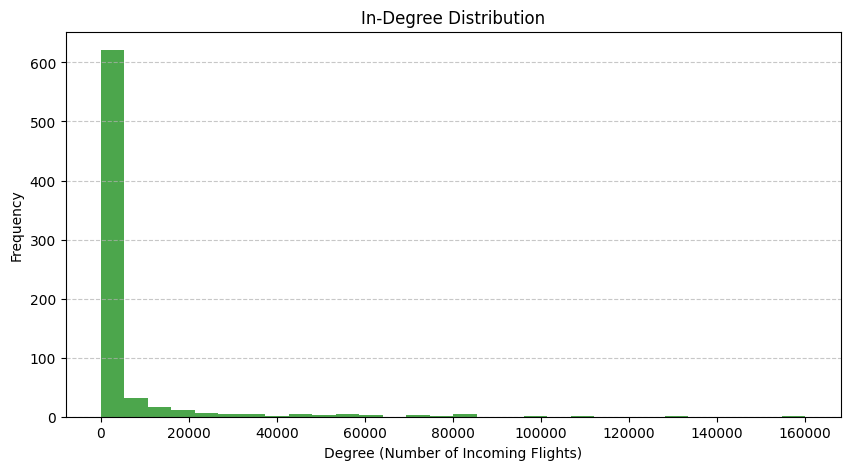

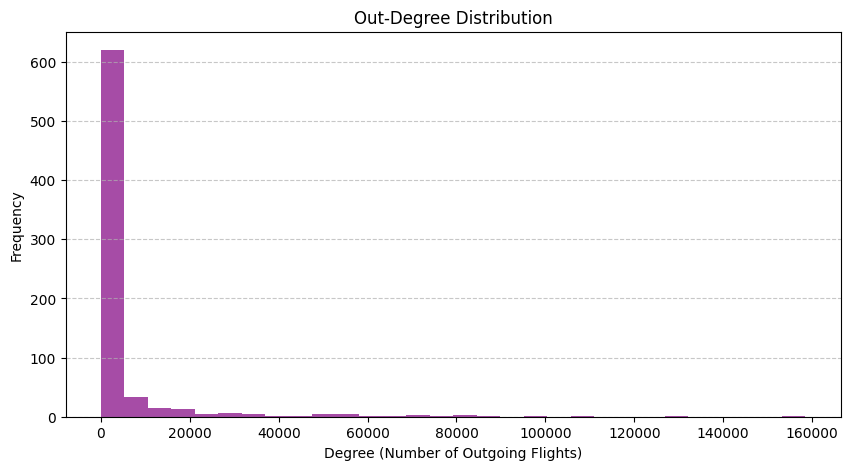


Hub Airports Table:
Hub Airport  Out-Degree
        ORD      158496
        ATL      131046
        DFW      106698
        DTW       99624
        MSP       98922
        LAX       87299
        CLT       85615
        PHL       83244
        IAH       81249
        EWR       79810
        STL       76284
        PHX       71109
        MEM       70971
        PIT       70043
        MCO       63865
        LAS       61990
        CVG       61590
        SFO       57206
        BOS       56997
        CLE       56068
        SEA       53180
        JFK       53136
        LGA       52245
        BWI       48927
        MIA       48737
        SLC       48734
        IAD       48132
        DCA       46845
        IND       43809
        TPA       41646
        MCI       38869
        FLL       36396
        BNA       36301
        RDU       33800
        PDX       33757
        MKE       30803
        MSY       30572
        CMH       29671
        SAN       27841
        MDW       2

In [14]:

def summarize_graph_features(data):
  
    # Calculate number of nodes and edges
    num_nodes = len(set(data["Origin_airport"]).union(set(data["Destination_airport"])))  
    num_edges = len(data[["Origin_airport", "Destination_airport"]].drop_duplicates())  #
    
   
    if num_nodes > 1:
        density = 2 * num_edges / (num_nodes * (num_nodes - 1))
    else:
        density = 0

   
    in_degrees_manual = {}
    out_degrees_manual = {}
    nodes = set(data["Origin_airport"]).union(set(data["Destination_airport"]))
    for node in nodes:
        in_degrees_manual[node] = len(data[data["Destination_airport"] == node])
        out_degrees_manual[node] = len(data[data["Origin_airport"] == node])
    
   
    degree_threshold = np.percentile(list(out_degrees_manual.values()), 90)
    hubs = [node for node, degree in out_degrees_manual.items() if degree >= degree_threshold]
    
    
    hub_data = pd.DataFrame({
        "Hub Airport": hubs,
        "Out-Degree": [out_degrees_manual.get(hub, 0) for hub in hubs]
    }).sort_values(by="Out-Degree", ascending=False)

  
    print("Graph Summary Report")
    print(f"Total Number of Nodes (Airports): {num_nodes}")
    print(f"Total Number of Edges (Flights): {num_edges}")
    print(f"Graph Density: {density:.6f}")
    print(f"Number of Hub Airports: {len(hubs)}")
    
  
    plt.figure(figsize=(10, 5))
    plt.hist(in_degrees_manual.values(), bins=30, alpha=0.7, color='green')
    plt.title("In-Degree Distribution")
    plt.xlabel("Degree (Number of Incoming Flights)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.hist(out_degrees_manual.values(), bins=30, alpha=0.7, color='purple')
    plt.title("Out-Degree Distribution")
    plt.xlabel("Degree (Number of Outgoing Flights)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    print("\nHub Airports Table:")
    print(hub_data.to_string(index=False))

graph_summary = summarize_graph_features(data)

  

Summary Report Features

1.	Node and Edge Count:

•	The total number of nodes (N) and edges (E) are calculated:

•	N = 727 (Unique airports)

•	E = 36,719 (Unique routes)

•	This reflects the scale of the U.S. flight network.

2.	Graph Density:

•	The calculated density is approximately 0.139139.

•	The graph is classified as dense, highlighting the strong connectivity within the flight network.

3.	Degree Distribution:

•	The In-Degree histogram reveals that most airports receive flights from only a few origins, while a small number (hubs) have significantly higher in-degrees.

•	The Out-Degree histogram shows a similar pattern, with a few airports dominating the outgoing flights.

4.	Hub Airports:

•	A total of 71 hub airports are identified, based on the 90th percentile of out-degree values.

•	Example hubs include: ATL, ORD, JFK, LAX, SEA.

•	These airports are critical to the network’s efficiency and resilience.

Commentary

•	This function successfully summarizes the key structural properties of the flight network.

•	The high density indicates a well-connected network, ensuring efficient transportation and route availability.

•	Degree distributions confirm the hierarchical structure, with a few major hubs playing dominant roles.

•	Hub airports are critical for ensuring connectivity, but their significance also poses a risk if disruptions occur.

•	Overall, this analysis highlights the importance of maintaining and optimizing hub performance for network stability.


### **1.3. Deeper Dataset Analysis**

#### **1.3.1. Calculating Total Passenger Flow Between Origin and Destination Cities**

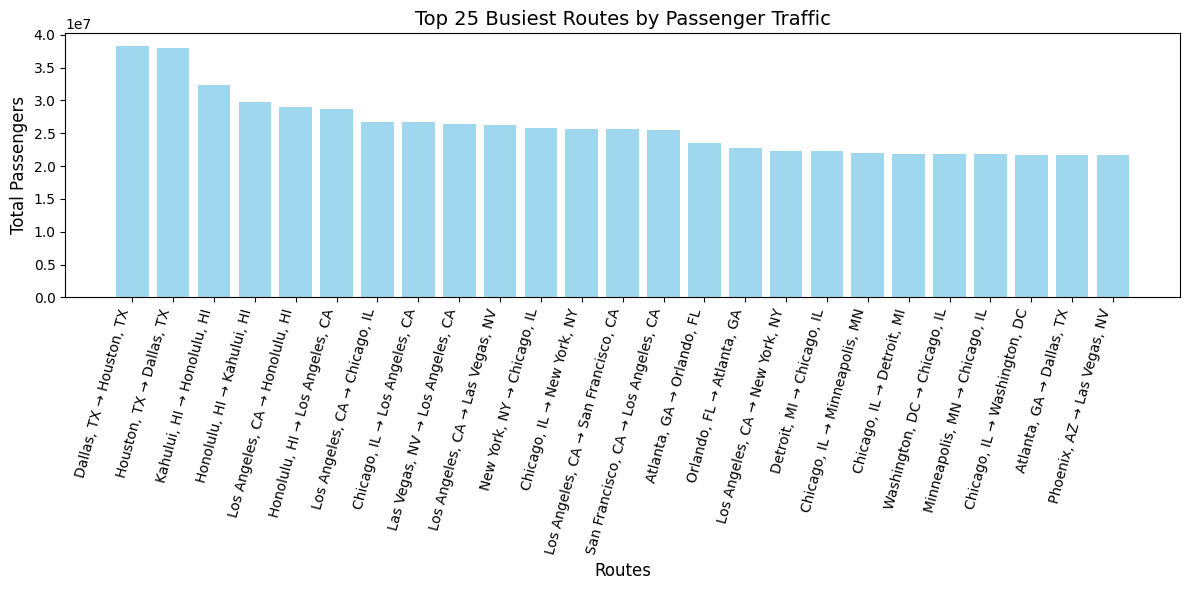

Top 25 Busiest Routes:
                                     Route  Total_Passengers
7122              Dallas, TX → Houston, TX          38295025
12391             Houston, TX → Dallas, TX          37989016
13585           Kahului, HI → Honolulu, HI          32364664
12259           Honolulu, HI → Kahului, HI          29744742
16133       Los Angeles, CA → Honolulu, HI          28964232
12264       Honolulu, HI → Los Angeles, CA          28632161
16083        Los Angeles, CA → Chicago, IL          26751937
5323         Chicago, IL → Los Angeles, CA          26645096
15218      Las Vegas, NV → Los Angeles, CA          26333721
16152      Los Angeles, CA → Las Vegas, NV          26177809
19394           New York, NY → Chicago, IL          25824282
5355            Chicago, IL → New York, NY          25697559
16218  Los Angeles, CA → San Francisco, CA          25661782
24933  San Francisco, CA → Los Angeles, CA          25458207
1511             Atlanta, GA → Orlando, FL          23531244
2

In [15]:

# Define the function
def visualize_passenger_flow_with_improvements(passenger_flow_data, top_k=25):
    
    # Sort and select the top busiest routes
    busiest_routes = passenger_flow_data.sort_values(by='Total_Passengers', ascending=False).head(top_k)

    busiest_routes['Route'] = busiest_routes['Origin'] + " → " + busiest_routes['Destination']

    plt.figure(figsize=(12, 6))
    plt.bar(busiest_routes['Route'], busiest_routes['Total_Passengers'], alpha=0.8, color='skyblue')
    plt.title(f"Top {top_k} Busiest Routes by Passenger Traffic", fontsize=14)
    plt.xlabel("Routes", fontsize=12)
    plt.ylabel("Total Passengers", fontsize=12)
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_k} Busiest Routes:")
    print(busiest_routes[['Route', 'Total_Passengers']])

   
    top_25_total = busiest_routes['Total_Passengers'].sum()
    overall_total = passenger_flow_data['Total_Passengers'].sum()
    contribution_percentage = (top_25_total / overall_total) * 100
    print(f"\nTop {top_k} Routes Contribution to Total Passenger Flow: {contribution_percentage:.2f}%")

    passenger_flow_data.to_csv("total_passenger_flow.csv", index=False)
    print("\nResults saved to 'total_passenger_flow.csv'.")

  
    print("\nScrollable Table of All Routes and Passenger Flow:")
    display(HTML(passenger_flow_data.to_html(index=False, notebook=True, max_rows=10, max_cols=3)))

    return busiest_routes[['Route', 'Total_Passengers']]

total_passenger_flow = data.groupby(["Origin_city", "Destination_city"])["Passengers"].sum().reset_index()

total_passenger_flow.columns = ["Origin", "Destination", "Total_Passengers"]

busiest_routes = visualize_passenger_flow_with_improvements(total_passenger_flow, top_k=25)

Graph Analysis

1.	Dallas ↔ Houston:

•	The route between Dallas, TX → Houston, TX and Houston, TX → Dallas, TX shows an extraordinary level of passenger traffic.

•	With a combined total of approximately 76 million passengers, this route stands out as the busiest in the U.S., reflecting a strong economic and social connection between these two cities.

2.	Hawaii Routes:

•	The Kahului, HI ↔ Honolulu, HI route highlights the intensity of air travel between the Hawaiian Islands.

•	Driven by tourism and local travel, these routes rank among the busiest in the U.S.

•	Limited alternative transportation options between islands likely contribute to this high traffic.

3.	The Importance of Los Angeles:

•	Routes originating from or ending in Los Angeles, CA dominate the chart:

•	Los Angeles, CA → Honolulu, HI

•	Los Angeles, CA → Chicago, IL

•	Los Angeles, CA → Las Vegas, NV

•	These routes emphasize Los Angeles as a major hub for both business and tourism.

4.	Las Vegas and Chicago Routes:

•	Las Vegas → Los Angeles and Chicago → Los Angeles routes illustrate the impact of business and leisure-focused travel.

•	Las Vegas, as an entertainment hub, strengthens its connectivity with Los Angeles and Chicago.

Overall Commentary

This graph effectively highlights the critical nodes and popular routes within the U.S. flight network. It also reflects:

1.	Strong Connectivity Between Major Cities and Tourist Regions:

•	Major urban centers like Dallas, Houston, and Los Angeles are highly interconnected, reflecting economic and cultural ties.

•	Tourist hotspots like Hawaii and Las Vegas further underscore the influence of tourism on air travel.

2.	Key Drivers of Traffic Intensity:

•	Economic activity and tourism appear to be the primary factors behind these high-traffic routes.

•	Business-focused and leisure-oriented travel dominate these connections.

3.	Insights for Network Optimization:

•	High-traffic routes, such as those between Dallas and Houston or Los Angeles and Honolulu, can benefit from enhanced flight capacity to manage demand.

•	Understanding these patterns is critical for optimizing flight schedules, reducing congestion, and improving passenger experience.

#### **1.3.3. Calculating Average Passengers Per Flight**

Global Average Passengers Per Flight: 45.45

Utilization Status Distribution (%):
Utilization_Status
Under-utilized    42.427626
Over-utilized     28.933250
Optimal           28.639124
Name: proportion, dtype: float64

Results saved to 'route_utilization_analysis.csv'.


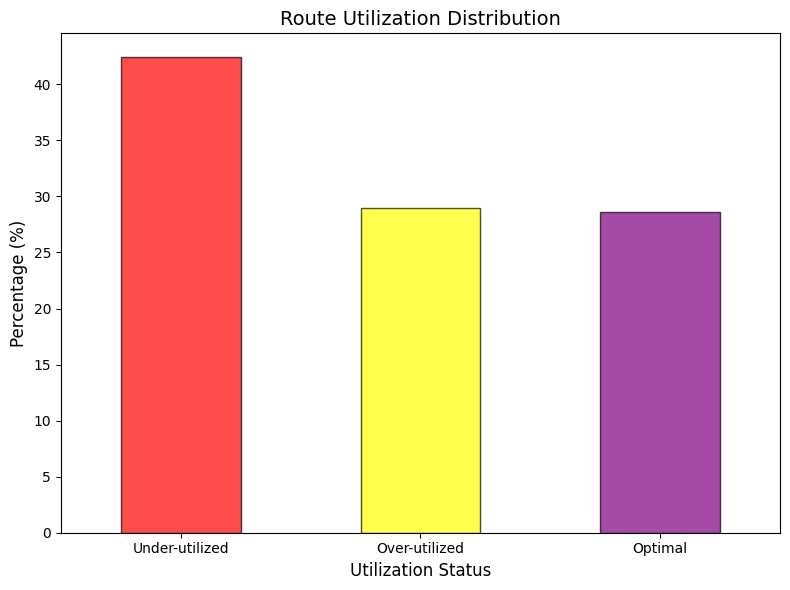

In [16]:

def analyze_route_utilization(flight_data):
  
    
    route_stats = (
        flight_data.groupby(['Origin_airport', 'Destination_airport'])
        .agg(
            Total_Passengers=('Passengers', 'sum'),
            Total_Flights=('Flights', 'sum')
        )
        .reset_index()
        .rename(columns={'Origin_airport': 'Origin', 'Destination_airport': 'Destination'})
    )

    route_stats['Avg_Passengers_Per_Flight'] = route_stats['Total_Passengers'] / route_stats['Total_Flights']

    global_avg = route_stats['Avg_Passengers_Per_Flight'].mean()
    print(f"Global Average Passengers Per Flight: {global_avg:.2f}")

    route_stats['Utilization_Status'] = route_stats['Avg_Passengers_Per_Flight'].apply(
        lambda x: 'Under-utilized' if x < 0.5 * global_avg else (
            'Over-utilized' if x > 1.5 * global_avg else 'Optimal')
    )

    utilization_distribution = route_stats['Utilization_Status'].value_counts(normalize=True) * 100
    print("\nUtilization Status Distribution (%):")
    print(utilization_distribution)

   
    route_stats.to_csv("route_utilization_analysis.csv", index=False)
    print("\nResults saved to 'route_utilization_analysis.csv'.")

    
    plt.figure(figsize=(8, 6))
    utilization_distribution.plot(kind='bar', color=['red', 'yellow', 'purple'], alpha=0.7, edgecolor='black')
    plt.title("Route Utilization Distribution", fontsize=14)
    plt.xlabel("Utilization Status", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    display(HTML(route_stats.to_html(index=False, notebook=True, max_rows=10, max_cols=10)))

    return route_stats


route_utilization = analyze_route_utilization(data)

#### **1.3.4. Visualizing the Flight Network’s Geographic Spread**

##### **1.3.4.1. Sampling for Faster Map Generation**

When working with large datasets, processing all flight connections can be time-consuming. Instead, sampling a subset of connections helps generate the map faster while still providing valuable insights.

**Step 1: Identifying Missing Coordinates**

In [17]:
# Check for missing coordinates
missing_origin_coords = data[
    data['Org_airport_lat'].isnull() | data['Org_airport_long'].isnull()
]['Origin_airport'].unique()

missing_dest_coords = data[
    data['Dest_airport_lat'].isnull() | data['Dest_airport_long'].isnull()
]['Destination_airport'].unique()

missing_airports = set(missing_origin_coords).union(set(missing_dest_coords))

print(f"Number of airports with missing coordinates: {len(missing_airports)}")
print("Airports with missing coordinates:")
print(missing_airports)

Number of airports with missing coordinates: 243
Airports with missing coordinates:
{'SNL', 'MOP', 'DCU', 'HKS', 'SME', 'SER', 'SSI', 'AXV', 'WBR', 'ELN', 'DNV', 'NZJ', 'AID', 'MDD', 'TVI', 'PRZ', 'DVN', 'OSU', 'DNN', 'EKI', 'RMG', 'WTC', 'XWL', 'ASN', 'SGH', 'GRD', 'AMW', 'NGP', 'GMU', 'FVS', 'MNN', 'SWW', 'TN3', 'GWO', 'SWO', 'SAD', 'ASL', 'SUM', 'SBM', 'SHN', 'LEW', 'MHL', 'LOZ', 'BKX', 'MZZ', 'BGS', 'MMI', 'CAD', 'CNW', 'JCC', 'BVX', 'GBD', 'EKX', 'OTM', 'HUM', 'YKN', 'EAR', 'CRE', 'ZZV', 'DQU', 'MIO', 'STK', 'DQC', 'MOR', 'BSM', 'RBL', 'AOH', 'LUL', 'BYI', 'SRC', 'LKE', 'UXJ', 'MS1', 'WMH', 'CPS', 'THV', 'MUT', 'DUC', 'GRF', 'BFR', 'DMO', 'WFB', 'CHI', 'TDW', 'OWA', 'VWD', 'ODW', 'PNC', 'CGF', 'GDC', 'DQF', 'GBG', 'MIQ', 'VWH', 'ARB', 'ILE', 'NY3', 'TX6', 'GCY', 'ATO', 'HFD', 'BOK', 'KY3', 'MI2', 'MRC', 'PWA', 'TSM', 'AR1', 'OH2', 'JZU', 'BJJ', 'STF', 'IRS', 'IN1', 'MPS', 'MVN', 'BKG', 'LJY', 'VWT', 'FEP', 'SIK', 'GVL', 'CWI', 'RID', 'NIP', 'RSN', 'DLF', 'DNE', 'RUI', 'PHD', 'WDG'

**Step 2: Completing Missing Coordinates**

In [18]:
!pip3 install geopy

In [19]:
# OpenStreetMap geocoder control
geolocator = Nominatim(user_agent="flight_network")
location = geolocator.geocode("Los Angeles airport")
print(location.latitude, location.longitude)

33.94216754999999 -118.42135906141587


In [20]:

# Initialize the OpenStreetMap Geocoder
geolocator = Nominatim(user_agent="airport_locator")

def prepare_missing_airports_with_cities(missing_airports, dataset):
    
    missing_airports_with_cities = {}
    for airport in missing_airports:
        
        city_info = dataset.loc[dataset['Origin_airport'] == airport, 'Origin_city']
        if city_info.empty:
            city_info = dataset.loc[dataset['Destination_airport'] == airport, 'Destination_city']
        
      
        missing_airports_with_cities[airport] = city_info.values[0] if not city_info.empty else None
    return missing_airports_with_cities

def fetch_coordinates_with_fallback(airport_code, city_name=None):
    
    try:
        
        if airport_code:
            location = geolocator.geocode(f"{airport_code} airport")
            if location:
                return location.latitude, location.longitude
        
        
        if city_name:
            location = geolocator.geocode(city_name)
            if location:
                return location.latitude, location.longitude
    except Exception as e:
        print(f"Error fetching coordinates for {airport_code} or {city_name}: {e}")
    return None, None

# Missing airport codes
missing_airports = ['TN6', 'FVS', 'TN3', 'JSE', 'VWH', 'JCC', 'JZU', 'JRA', 'LWF', 'KY3',
                    'OH3', 'ESF', 'HIK', 'OH1', 'OH5', 'LSD', 'AWX', 'MI2', 'XWL', 'AIY',
                    'LJY', 'HLM', 'ZXX', 'VWT', 'TX6', 'CGX', 'VWD', 'TSS', 'KY1', 'IN1',
                    'KY5', 'DQU', 'OH2', 'NZJ', 'STF', 'WV1', 'UXJ', 'XXW', 'NY3', 'WQM',
                    'JRB', 'VWL', 'DQC', 'DQF']

# Map missing airport codes to their corresponding cities
missing_airports_with_cities = prepare_missing_airports_with_cities(missing_airports, data)

missing_coords = {}
not_found_coords = []

for airport, city in missing_airports_with_cities.items():
    lat, lon = fetch_coordinates_with_fallback(airport, city)
    if lat and lon:
        missing_coords[airport] = (lat, lon)
    else:
        not_found_coords.append(airport)
        print(f"Coordinates not found for {airport}.")
    time.sleep(1)  

# Summary of completed and missing coordinates
completed_count = len(missing_coords)
not_found_count = len(not_found_coords)

print(f"\nCompleted coordinates: {completed_count}")
print(missing_coords)

if not_found_count > 0:
    print(f"\nCoordinates not found: {not_found_count}")
    print(not_found_coords)


Completed coordinates: 44
{'TN6': (36.0346393, -89.3857496), 'FVS': (43.8235163, -111.787022), 'TN3': (35.4492404, -86.7888887), 'JSE': (58.3019496, -134.419734), 'VWH': (31.83688, -102.0103767), 'JCC': (37.7792588, -122.4193286), 'JZU': (42.8788667, -73.1968205), 'JRA': (40.7127281, -74.0060152), 'LWF': (35.2423023, -87.3347389), 'KY3': (38.0561079, -83.9431961), 'OH3': (39.3331197, -82.9824019), 'ESF': (31.3119463, -92.4453558), 'HIK': (21.304547, -157.855676), 'OH1': (39.5364511, -83.4390843), 'OH5': (39.1014537, -84.5124602), 'LSD': (38.0464066, -84.4970393), 'AWX': (32.2690953, -102.6042447), 'MI2': (42.7876022, -86.1090828), 'XWL': (43.190039, -112.348357), 'AIY': (39.3642852, -74.4229351), 'LJY': (37.6806669, -92.6637835), 'HLM': (42.7876022, -86.1090828), 'ZXX': (46.2087066, -119.119919), 'VWT': (32.0723862, -84.2326876), 'TX6': (30.2711286, -97.7436995), 'CGX': (41.8755616, -87.6244212), 'VWD': (36.3277959, -119.6461565), 'TSS': (40.7127281, -74.0060152), 'KY1': (37.6456488, 

**Step 3: Add Missing Coordinates to the Dataset**

In [21]:

missing_origin_coords = data[data['Org_airport_lat'].isnull() | data['Org_airport_long'].isnull()]['Origin_airport'].unique()
missing_destination_coords = data[data['Dest_airport_lat'].isnull() | data['Dest_airport_long'].isnull()]['Destination_airport'].unique()

remaining_missing_airports = list(set(missing_origin_coords).union(set(missing_destination_coords)))


remaining_missing_with_cities = prepare_missing_airports_with_cities(remaining_missing_airports, data)

remaining_coords = {}
for airport, city in remaining_missing_with_cities.items():
    lat, lon = fetch_coordinates_with_fallback(airport, city)
    if lat and lon:
        remaining_coords[airport] = (lat, lon)
    else:
        print(f"Coordinates not found for {airport}.")
    time.sleep(1)  

for airport, coords in remaining_coords.items():
   
    data.loc[data['Origin_airport'] == airport, ['Org_airport_lat', 'Org_airport_long']] = coords
   
    data.loc[data['Destination_airport'] == airport, ['Dest_airport_lat', 'Dest_airport_long']] = coords

remaining_missing_coords = data[
    data['Org_airport_lat'].isnull() | data['Dest_airport_lat'].isnull()
]
print(f"\nNumber of remaining missing coordinates: {len(remaining_missing_coords)}")


Number of remaining missing coordinates: 0


In [22]:
# Sample a subset of data for faster map rendering
sampled_data = data.sample(n=1000, random_state=42) 

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)


marker_cluster = MarkerCluster().add_to(m)


for _, row in sampled_data.iterrows():
    if not pd.isna(row["Org_airport_lat"]) and not pd.isna(row["Dest_airport_lat"]):
       
        folium.Marker(
            location=[row["Org_airport_lat"], row["Org_airport_long"]],
            icon=folium.Icon(icon="plane", prefix="fa", color="blue"),
            tooltip=f"Origin: {row['Origin_city']}"
        ).add_to(marker_cluster)

       
        folium.Marker(
            location=[row["Dest_airport_lat"], row["Dest_airport_long"]],
            icon=folium.Icon(icon="plane", prefix="fa", color="green"),
            tooltip=f"Destination: {row['Destination_city']}"
        ).add_to(marker_cluster)


for _, row in sampled_data.iterrows():
    if not pd.isna(row["Org_airport_lat"]) and not pd.isna(row["Dest_airport_lat"]):
        folium.PolyLine(
            locations=[
                [row["Org_airport_lat"], row["Org_airport_long"]],
                [row["Dest_airport_lat"], row["Dest_airport_long"]]
            ],
            color="blue",
            weight=1,
        ).add_to(m)


m

Analysis of Sampling:

1.	Improved Efficiency:

•	By sampling 1,000 connections, the map is generated significantly faster compared to processing the entire dataset.

•	Sampling strikes a balance between computational efficiency and meaningful visualization.

2.	Preserved Insights:

•	The sampled subset still provides a representative view of the network’s structure and key connections.

•	Major hubs and heavily trafficked routes remain visible.

3.	Flexibility:

•	The sample size can be adjusted (n=1000) to suit specific needs or hardware limitations.

Commentary

•	Sampling allows for quicker map generation without compromising the overall insights into the network’s structure.

•	The random sample ensures a fair representation of flight connections while avoiding unnecessary processing of the entire dataset.

•	For larger datasets or more granular analysis, stratified sampling could be implemented to focus on specific hubs or regions.

•	This approach is particularly beneficial when generating interactive maps, where rendering speed greatly impacts usability.

##### **1.3.4.2. Filtered Map: Showing Only the Busiest Routes**

In [23]:
# Filter the top 100 busiest routes based on the number of passengers
top_routes = data.sort_values(by="Passengers", ascending=False).head(100)

for _, row in top_routes.iterrows():
    if not pd.isna(row["Org_airport_lat"]) and not pd.isna(row["Dest_airport_lat"]):
        folium.PolyLine(
            locations=[
                [row["Org_airport_lat"], row["Org_airport_long"]],
                [row["Dest_airport_lat"], row["Dest_airport_long"]]
            ],
            color="blue",
            weight=1,
        ).add_to(m)


m

Purpose of Filtering:

1.	Focus on Key Connections:

•	By limiting the visualization to the 100 busiest routes, the map becomes more focused and easier to interpret.

•	Highlights the most significant connections in terms of passenger traffic.

2.	Improved Clarity:

•	Reduces clutter on the map, especially for datasets with a large number of routes.

•	Ensures the visualization emphasizes key hubs and traffic patterns.

3.	Customizability:

•	The threshold (e.g., top 100 routes) can be adjusted based on specific analysis requirements or regional focus.

Analysis of Results:

1.	Insights from Busiest Routes:

•	The map clearly illustrates the major hubs and their key connections.

•	Airports like Atlanta (ATL), Chicago (ORD), and Los Angeles (LAX) likely dominate these routes due to their central role in the network.

2.	Strategic Importance of Top Routes:

•	The busiest routes often align with major economic or tourist centers.

•	These routes are critical for ensuring high passenger flow and efficient connectivity within the network.

3.	Focus on Specific Regions or Routes:

•	This filtering approach can be further refined to focus on routes within a specific geographic region or connecting particular hubs (e.g., East Coast, West Coast, or Hawaii).

Commentary

•	Filtering to display only the busiest routes provides a clear and actionable view of the most critical connections within the flight network.
	
•	The visualization highlights the importance of major hubs and their role in connecting high-demand destinations.
	
•	This approach allows for focused analysis, which is particularly useful for identifying patterns or potential bottlenecks in the network.
	
•	Adjusting the filter threshold can enable region-specific analyses or comparisons across different traffic tiers.

## **2. Nodes' Contribution (Q2)**

## **3. Finding Best Routes (Q3)**

## **4. Airline Network Partitioning (Q4)**

## **5. Finding and Extracting Communities (Q5)**

### **5.1. Graph Analysis**

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from functions.q5_1 import *

In [2]:
data = pd.read_csv('Airports2.csv')

#### **Data Preprocessing for the purpose of this point**

In [3]:
df = data.copy()

df = df.dropna(subset=['Origin_city', 'Destination_city'])
df = df.drop_duplicates(subset=['Origin_city', 'Destination_city'])
df = df[df['Origin_city'] != df['Destination_city']]
df['Origin_city'] = df['Origin_city'].str.title()
df['Destination_city'] = df['Destination_city'].str.title()
df = df[(df['Flights'] > 0) & (df['Distance'] > 0) & (df['Passengers'] > 0) & (df['Seats'] > 0)]

Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Distance'] < (Q1 - 1.5 * IQR)) | (df['Distance'] > (Q3 + 1.5 * IQR)))]

####  **Creation of the graph starting from the dataset**

In [4]:
G = nx.from_pandas_edgelist(df, 'Origin_city', 'Destination_city')

#### **Graph Visualization**

(449, 13344)

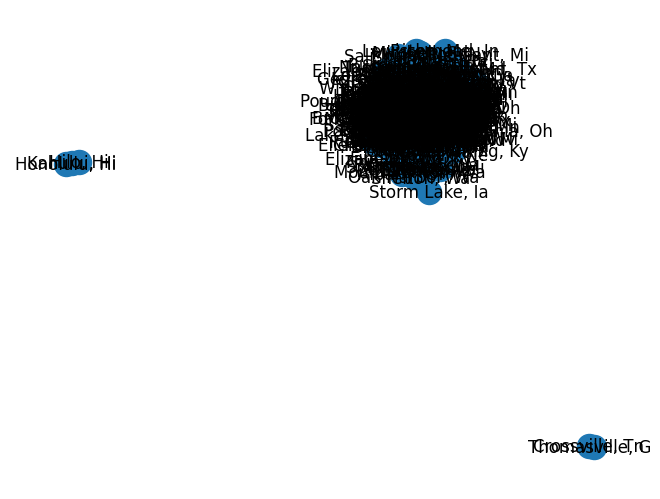

In [10]:
# visualize the graph
nx.draw(G, with_labels = True)
len(G.nodes), len(G.edges)

#### **Function**

In [12]:
def community_detection(graph, c1, c2):
	"""
	This function takes a graph and two nodes, c1 and c2, and performs community detection using the Girvan-Newman algorithm.
	It returns the detected communities, the number of communities, and a boolean indicating whether c1 and c2 are in the same community.
	Parameters:
		graph (networkx.Graph): The input graph on which community detection is performed.
		c1 (node): The first node to check for community membership.
		c2 (node): The second node to check for community membership.
	Returns:
		tuple: A tuple containing:
			- node_groups (list of lists): A list of communities, where each community is represented as a list of nodes.
			- len(node_groups) (int): The number of detected communities.
			- same_group (bool): True if c1 and c2 are in the same community, False otherwise.
	"""

	node_groups = []
	same_group = False
	x = girvan_newman(graph)

	for i in x:
		node_groups.append(list(i))

	for group in node_groups:
		if c1 in group and c2 in group:
			same_group = True
     
	return node_groups, len(node_groups), same_group

#### **Results**

In [14]:
city_1 = 'Honolulu, Hi'
city_2 = 'Hilo, Hi'

result = community_detection(G.copy(), city_1, city_2)
communities = result[0]
print(f"The total number of communities is {result[1]}\n")

if result[2]:
    print(f"{city_1} and {city_2} are in the same community!\n")
else:
    print(f"{city_1} and {city_2} are NOT in the same community..\n")

for community in communities:
    print(community)

The total number of communities is 3

Honolulu, Hi and Hilo, Hi are in the same community!

['Ithaca, Ny', 'Rome, Ga', 'Peoria, Il', 'Tupelo, Ms', 'Seymour, In', 'Anderson, Sc', 'Greenville, Sc', 'Jackson, Ms', 'Carlsbad, Nm', 'Altus, Ok', 'Erie, Pa', 'Bismarck, Nd', 'South Bend, In', 'Fallon, Nv', 'Ogdensburg, Ny', 'Fresno, Ca', 'Rochester, Ny', 'Mason City, Ia', 'Green Bay, Wi', 'Decatur, Il', 'Wilmington, De', 'Sacramento, Ca', 'Laconia, Nh', 'Columbus, Ms', 'Del Rio, Tx', 'Binghamton, Ny', 'Show Low, Az', 'Bridgeport, Ct', 'Springfield, Mo', 'Montgomery, Al', 'Muskegon, Mi', 'Waterloo, Ia', 'Morgantown, Wv', 'Wichita, Ks', 'Dover, De', 'Indianapolis, In', 'Oneonta, Ny', 'Chattanooga, Tn', 'Alpena, Mi', 'Chico, Ca', 'Jackson, Wy', 'Cumberland, Md', 'Sioux City, Ia', 'Minneapolis, Mn', 'Billings, Mt', 'Kinston, Nc', 'Hartford, Ct', 'Lansing, Mi', 'Roswell, Nm', 'Quincy, Il', 'Lafayette, In', 'Nogales, Az', 'Cheyenne, Wy', 'Eugene, Or', 'Williamsport, Pa', 'Altoona, Pa', 'Miami, Fl', 

##### **Compute and plot all the communities together**

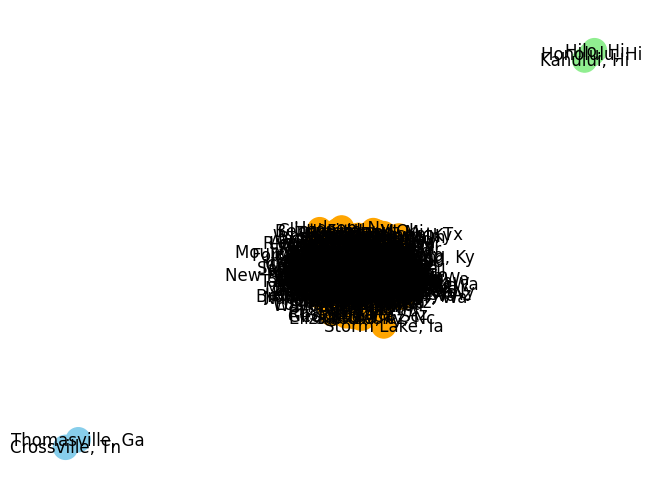

In [16]:
# plot all the communities (coloured differently)

color_map = []

for node in G:
    if node in communities[0]:
        color_map.append('orange')
    elif node in communities[1]:
        color_map.append('lightgreen')
    else:
        color_map.append('skyblue')

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

##### **First Community**

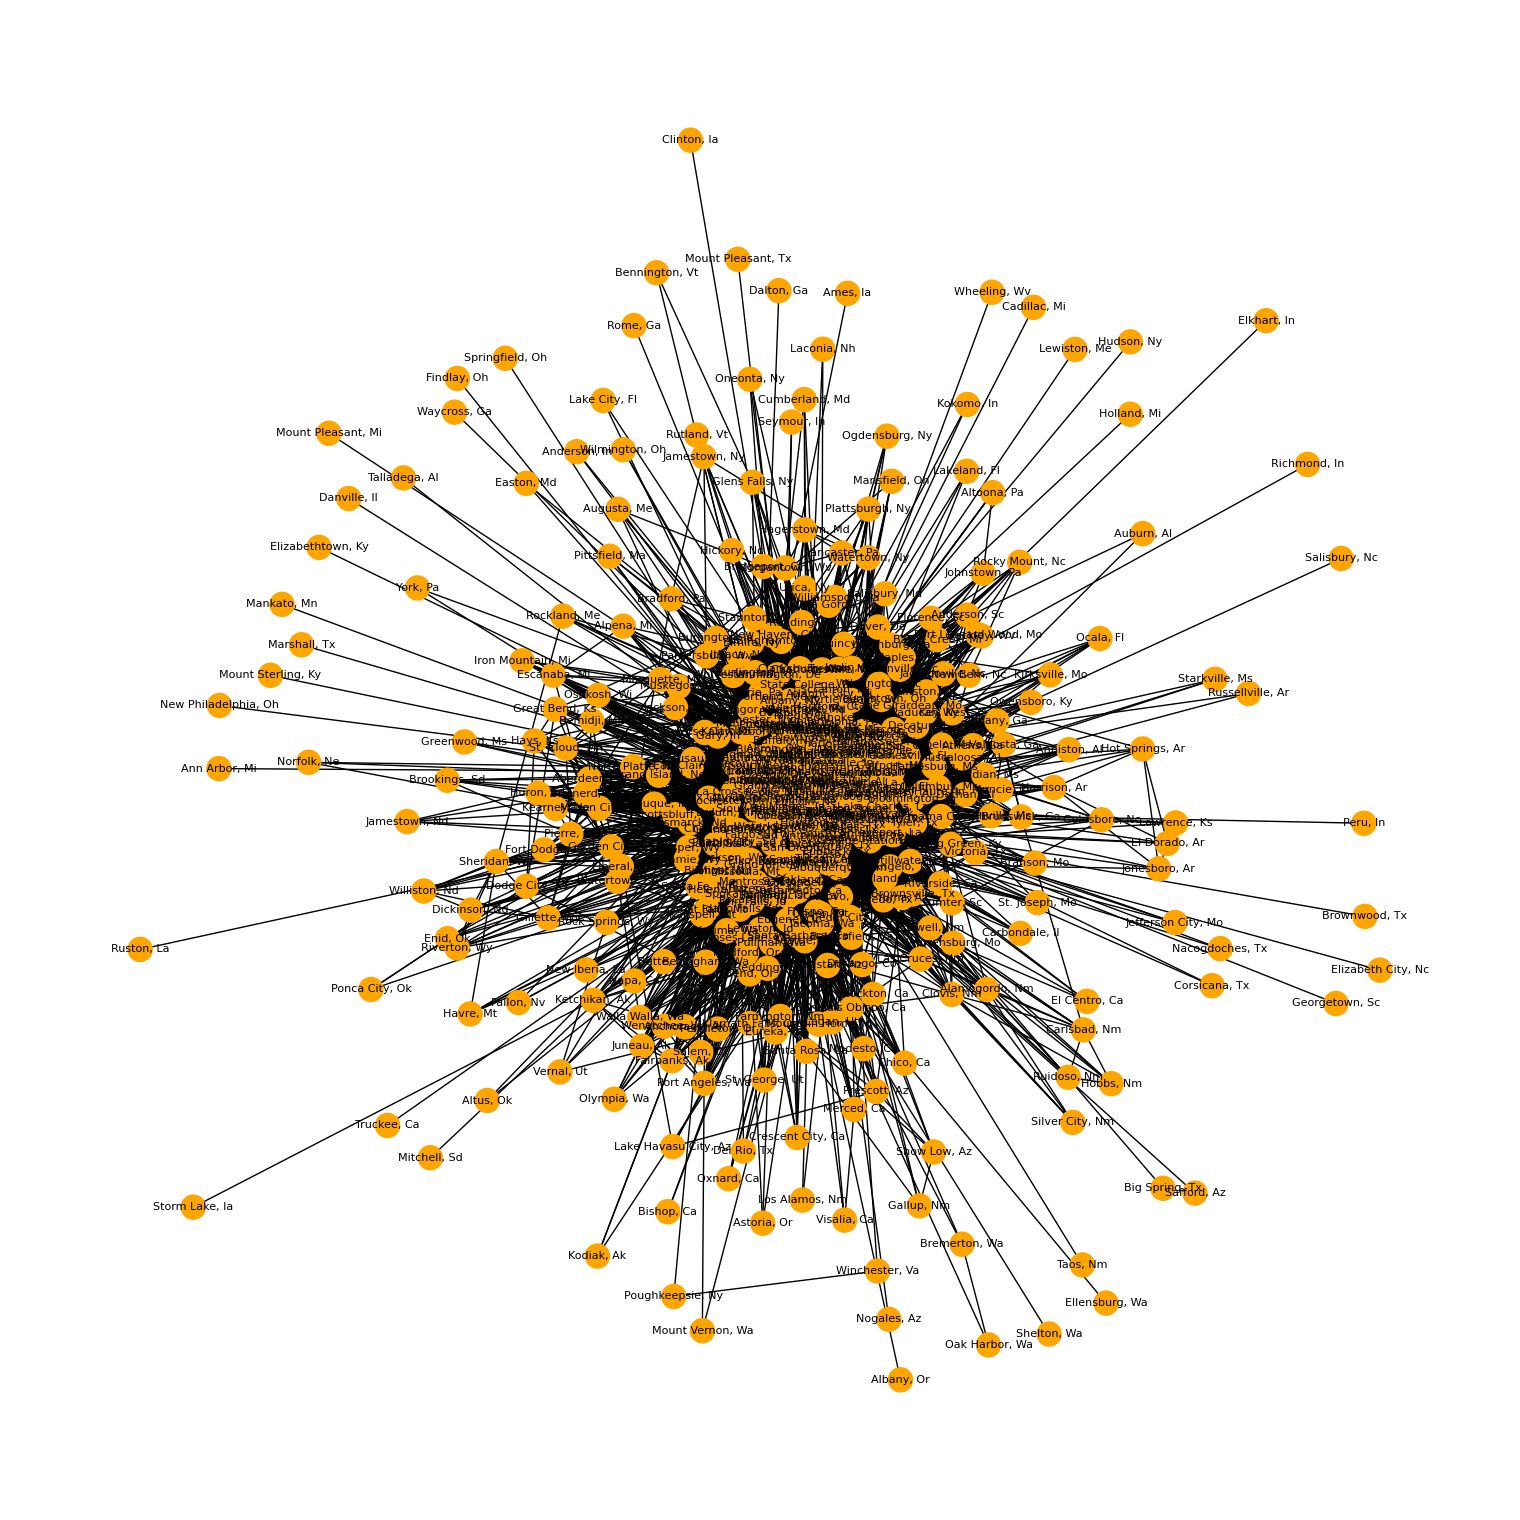

In [17]:
# create a subgraph for the first component
subgraph = G.subgraph(communities[0])

# sets the color of the nodes
color_map = ['orange' for _ in subgraph.nodes()]

# plots the subgraph
plt.figure(figsize=(15, 15))
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

##### **Second Community**

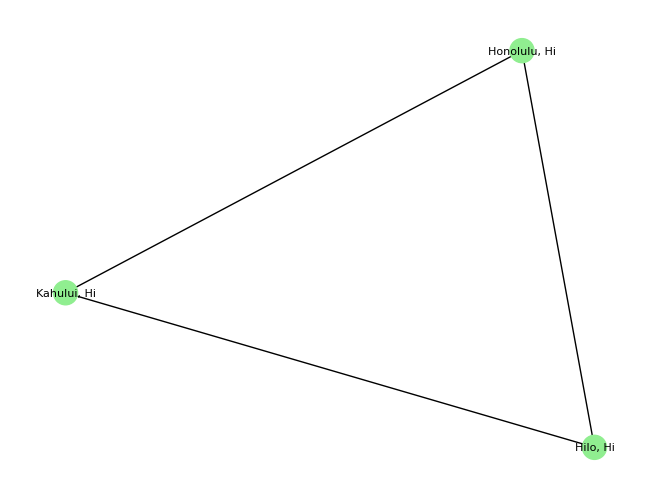

In [18]:
# create a subgraph for the second component
subgraph = G.subgraph(communities[1])

# sets the color of the nodes
color_map = ['lightgreen' for _ in subgraph.nodes()]

# plots the subgraph
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

##### **Third Community**

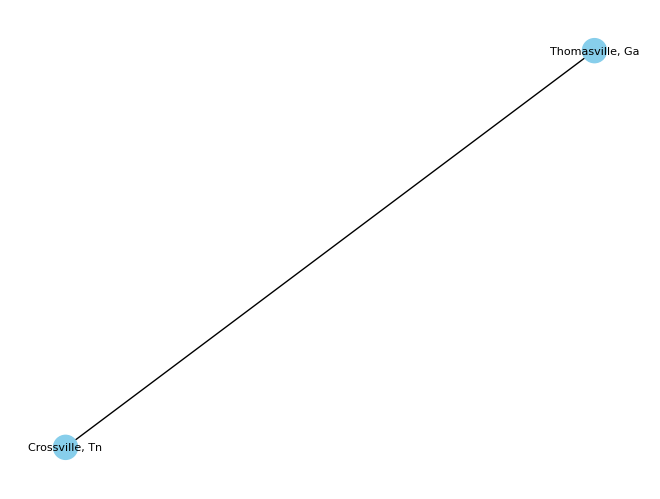

In [19]:
# create a subgraph for the third component
subgraph = G.subgraph(communities[2])

# sets the color of the nodes
color_map = ['skyblue' for _ in subgraph.nodes()]

# plots the subgraph
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

### **5.2. Alternative algorithm suggested by an LLM (Label Propagation Algorithm)**

Is a semi-supervised machine learning algorithm that assigns labels to previously unlabeled data points. At the start of the algorithm, a (generally small) subset of the data points have labels (or classifications). <br>
Each node “propagates” into the community with which it has the most connections. <br>
It's particularly valued for its speed and scalability, making it suitable for large networks.

#### **Main Steps**

**1. Initialization:** 
	
	Assign each node a unique label (e.g., its own node ID). This label represents the initial community of the node.

**2. Iterative Label Update (Propagation):**

    For each node, check the labels of its neighbors.
    Update the node's label to the most frequent label among its neighbors.
    If there's a tie in the most frequent labels, pick one randomly.

**3. Convergence:**

    Repeat step 2 until no labels change during an iteration (or a maximum number of iterations is reached).

**4. Community Extraction:**

    After convergence, nodes with the same label belong to the same community.

#### **Python Implementation**

In [5]:
from functions.q5_2 import *

In [6]:
def community_detection_2(graph, c1, c2):

	node_groups = []
	same_group = False
	x = label_propagation(graph)

	for i in x:
		node_groups.append(list(i))

	for group in node_groups:
		if c1 in group and c2 in group:
			same_group = True
     
	return node_groups, len(node_groups), same_group

#### **Results**

In [12]:
city_1 = 'Honolulu, Hi'
city_2 = 'Hilo, Hi'

result = community_detection_2(G.copy(), city_1, city_2)
communities = result[0]
print(f"The total number of communities is {result[1]}\n")

if result[2]:
    print(f"{city_1} and {city_2} are in the same community!\n")
else:
    print(f"{city_1} and {city_2} are NOT in the same community..\n")

for community in communities:
    print(community)

The total number of communities is 4

Honolulu, Hi and Hilo, Hi are in the same community!

['Manhattan, Ks', 'Ames, Ia', 'Eugene, Or', 'Bend, Or', 'Seattle, Wa', 'Portland, Or', 'Klamath Falls, Or', 'San Francisco, Ca', 'Los Angeles, Ca', 'Wenatchee, Wa', 'Yakima, Wa', 'Elko, Nv', 'Salem, Or', 'Spokane, Wa', 'Lewiston, Id', 'Astoria, Or', 'Port Angeles, Wa', 'Pendleton, Or', 'San Jose, Ca', 'Eureka, Ca', 'Pullman, Wa', 'Sacramento, Ca', 'Phoenix, Az', 'Longview, Tx', 'Fresno, Ca', 'Moses Lake, Wa', 'Billings, Mt', 'Salt Lake City, Ut', 'Casper, Wy', 'Reno, Nv', 'Fairbanks, Ak', 'Anchorage, Ak', 'Santa Fe, Nm', 'Albuquerque, Nm', 'Fort Smith, Ar', 'Las Vegas, Nv', 'Wichita, Ks', 'Duluth, Mn', 'Oklahoma City, Ok', 'San Diego, Ca', 'Santa Rosa, Ca', 'Oakland, Ca', 'Houston, Tx', 'El Paso, Tx', 'Dubuque, Ia', 'Helena, Mt', 'Dallas, Tx', 'Tulsa, Ok', 'Omaha, Ne', 'Waco, Tx', 'Butte, Mt', 'Austin, Tx', 'Peoria, Il', 'Wausau, Wi', 'Tucson, Az', 'Pueblo, Co', 'Topeka, Ks', 'Colorado Springs, 

##### **Compute and plot all the communities together**

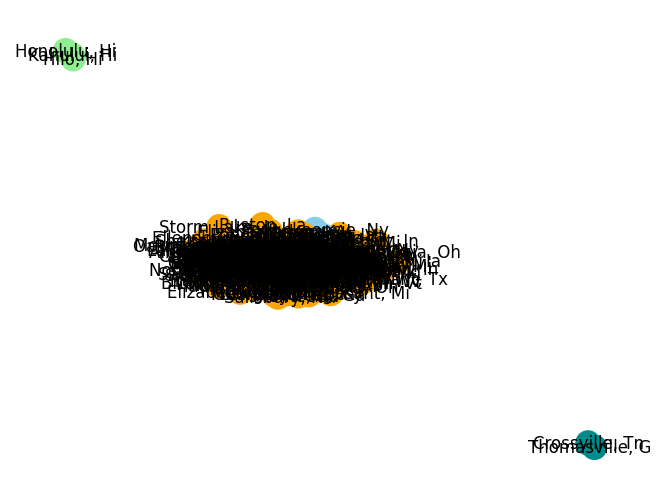

In [13]:
# plot all the communities (coloured differently)

color_map_2 = []

for node in G:
    if node in communities[0]:
        color_map_2.append('orange')
    elif node in communities[1]:
        color_map_2.append('lightgreen')
    elif node in communities[2]:
        color_map_2.append('skyblue')
    else:
        color_map_2.append('darkcyan')

nx.draw(G, node_color=color_map_2, with_labels=True)
plt.show()

##### **First Community**

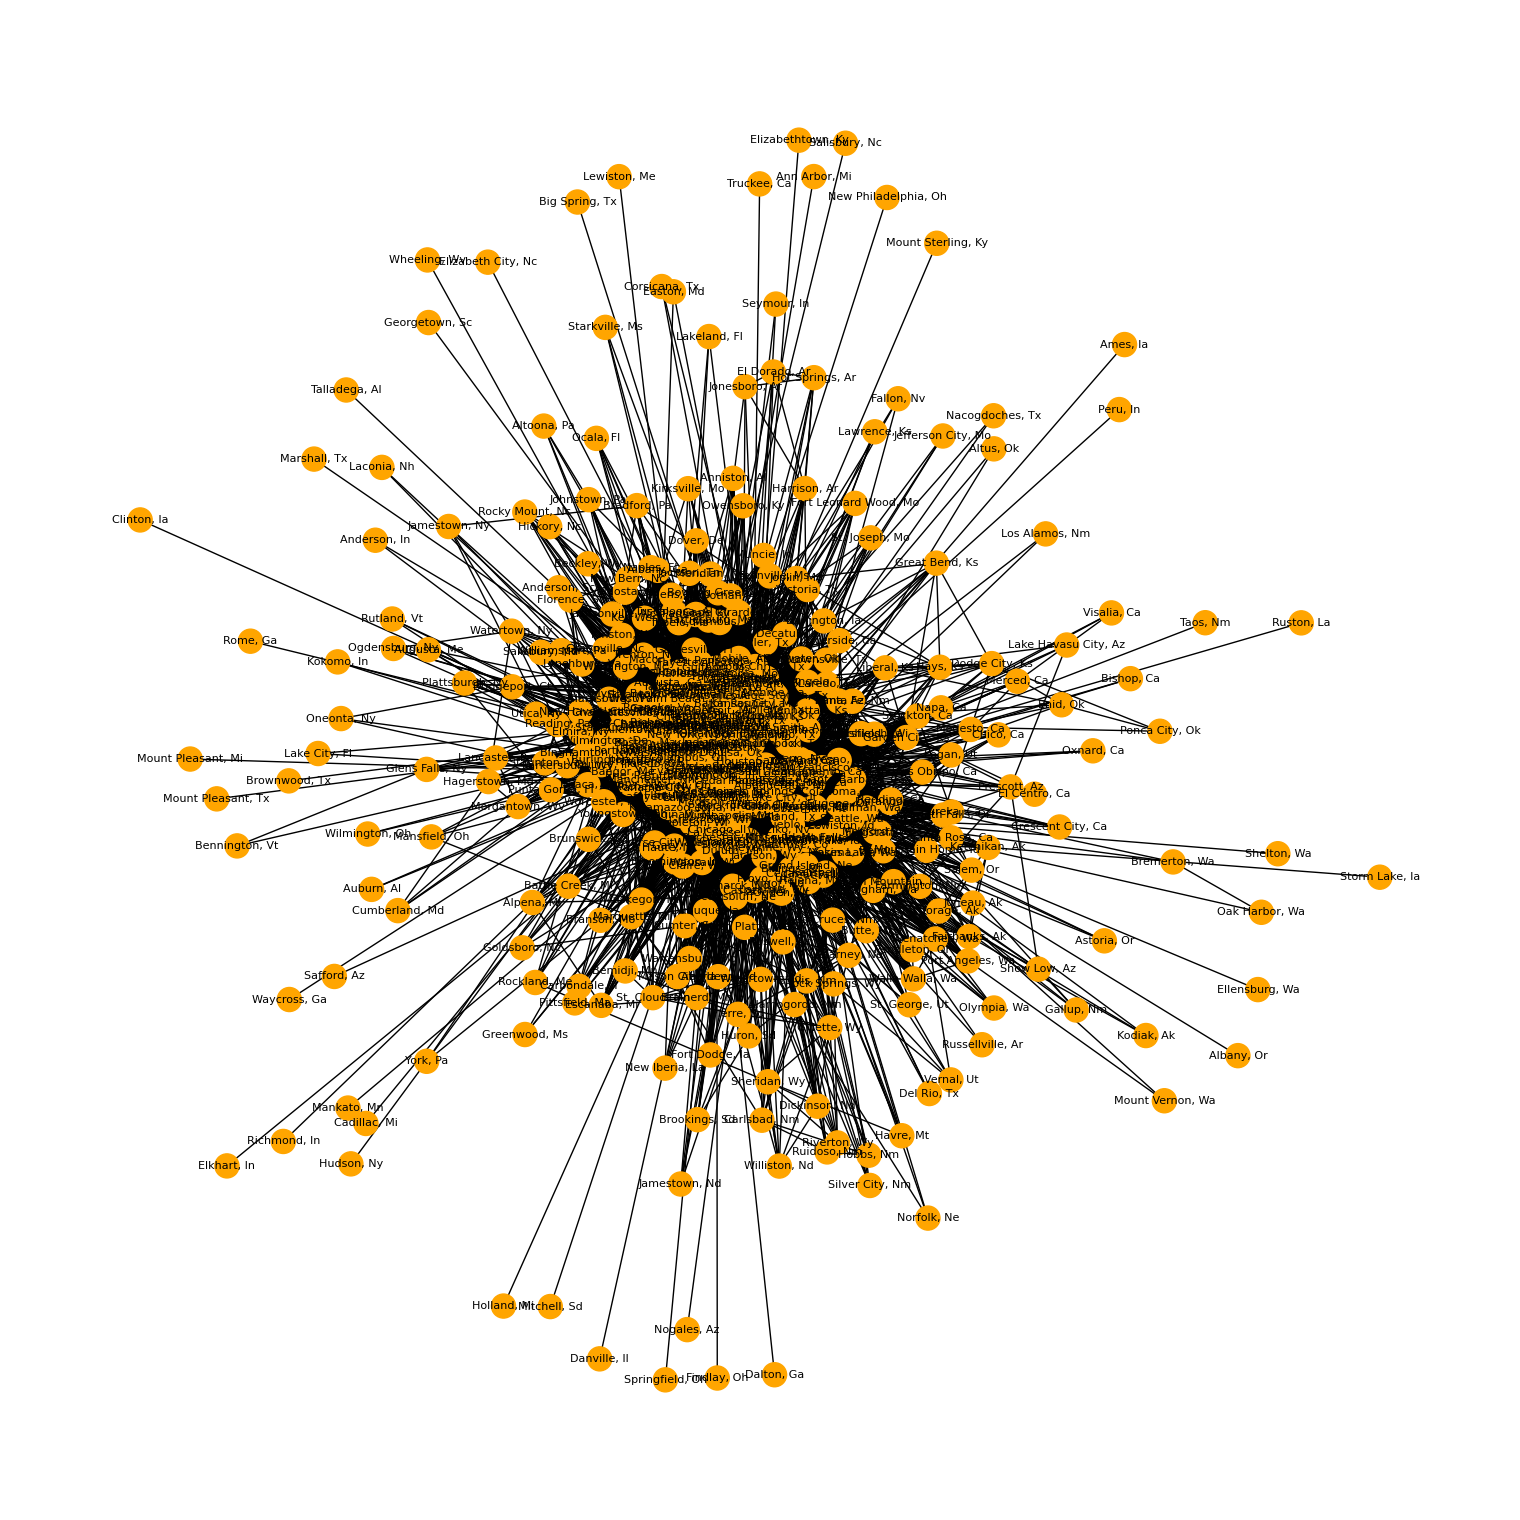

In [14]:
# create a subgraph for the first component
subgraph = G.subgraph(communities[0])

# sets the color of the nodes
color_map = ['orange' for _ in subgraph.nodes()]

# plots the subgraph
plt.figure(figsize=(15, 15))
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

##### **Second Community**

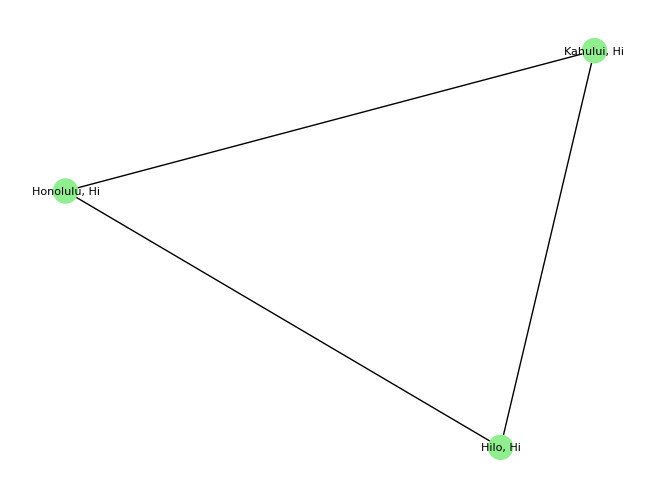

In [15]:
# create a subgraph for the second component
subgraph = G.subgraph(communities[1])

# sets the color of the nodes
color_map = ['lightgreen' for _ in subgraph.nodes()]

# plots the subgraph
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

##### **Third Community**

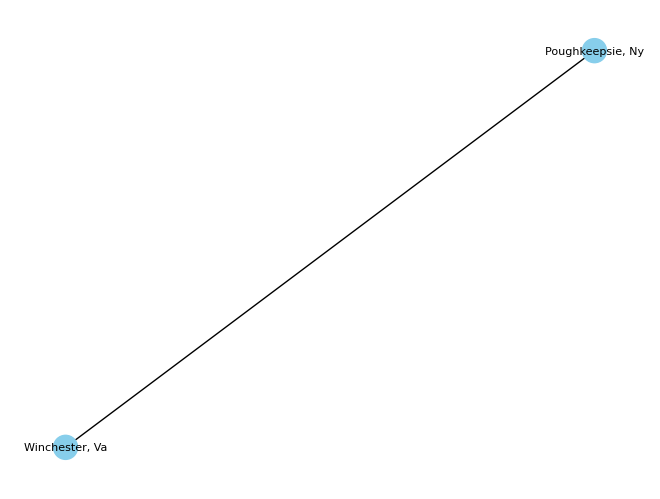

In [16]:
# create a subgraph for the third component
subgraph = G.subgraph(communities[2])

# sets the color of the nodes
color_map = ['skyblue' for _ in subgraph.nodes()]

# plots the subgraph
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

##### **Fourth Community**

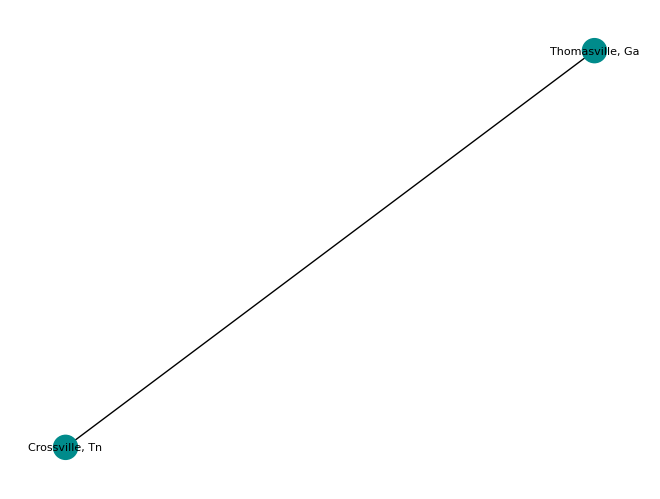

In [18]:
# create a subgraph for the fourth component
subgraph = G.subgraph(communities[3])

# sets the color of the nodes
color_map = ['darkcyan' for _ in subgraph.nodes()]

# plots the subgraph
nx.draw(subgraph, node_color=color_map, with_labels=True, node_size=300, font_size=8)
plt.show()

#### **Final Comparison**

##### **Differences between Girvan-Newman and Label Propagation**

**Girvan-Newman:**
- **Based on edge betweenness:** It identifies communities by iteratively removing the most "central" edges (those connecting multiple communities). It's computationally intensive and slow (as it recalculates edge betweenness repeatedly), making it suitable for smaller graphs.
- **Approach:** It divides the graph based on its global structure and is more likely to find larger, well-connected communities.
- **Results:** Given the same graph, it will always produce the same result.

**Label Propagation:**
- **Based on local dynamics:** It assigns labels to nodes and propagates these labels based on their neighbors. It doesn't rely on a global measure of graph "division" so is faster, more scalable and more suitable for largest graphs.
- **Approach:** It is sensitive to the local structure and can sometimes produce more communities, especially if there are smaller groups of nodes weakly connected to others.
- **Results:** The algorithm can yield slightly different results on each run, particularly if the order of node updates is not fixed.

**Number of communities:**<br>
In our case, as shown previously, girvan-newman found 3 communities while label propagation 4. This may be given by the different nature of the two algorithms where
- **Girvan-Newman** may stop at a division that optimizes a specific metric (e.g. modularity), thus identifying fewer communities.
- **Label Propagation**, being based on local propagation, may detect smaller or weakly connected substructures, with consequently, higher chances of finding more of them.

##### **Conclusions about the two approaches (which is better?)**

The goodness of either algorithm depends on the size of the graph and in our case certainly the graph cannot be considered small so in my opinion, as being more scalable and faster, the best algorithm is the one proposed by LLM i.e. Label Propagation (although Girvan-Newman is potentially more accurate). Probably an ideal approach would include the use of both algorithms: the Label Propagation for a fast solution and the Girvan-Newman for possibly confirming or deepening the results obtained.

## **Bonus Question - Connected Components on MapReduce**

## **Algorithmic Question (AQ)**